In [2]:
import os
import numpy
import pandas
import seaborn
seaborn.set_style('whitegrid')
seaborn.set_palette('colorblind')
seaborn.set_context('paper')

In [3]:
DATA_DIRECTORY = './petfinder_dataset/'


In [4]:
from sklearn.model_selection import train_test_split

dataset, dev_dataset = train_test_split( pandas.read_csv(os.path.join(DATA_DIRECTORY, 'train.csv')), test_size=0.2)

In [5]:
dataset.head(3)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
6082,1,12,307,0,1,2,7,0,2,2,1,1,1,1,2,0,41401,"18/9/10 Boris threw his wired looped snare, st...",4,8568
6016,2,2,266,0,3,1,2,7,1,1,2,2,2,1,4,0,41367,there is 4 kitten at my university but their m...,1,8470
1099,2,12,304,0,1,2,7,0,3,3,1,1,2,1,1,200,41326,Siblings that different character. Sophia(fema...,4,1567


In [6]:
dev_dataset.head(3)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
5483,1,24,307,0,2,2,7,0,2,1,1,1,1,1,1,0,41326,Snow is super friendly and docile She is good ...,3,7741
7209,2,3,266,0,2,1,2,7,2,2,1,1,2,1,1,0,41326,Teana is a very lucky girl that survived the r...,1,10138
8612,1,96,178,218,2,7,0,0,2,1,1,1,1,1,2,0,41326,"MY SASHA IS THE MOTHER OF MY OTHER FEMALE DOG,...",4,12182


In [7]:
target_col = 'AdoptionSpeed'
nlabels = dataset[target_col].unique().shape[0]

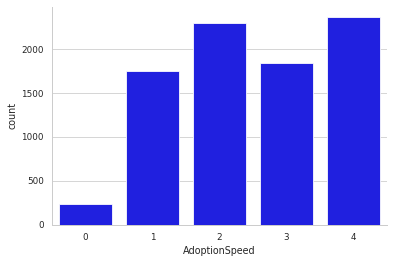

In [8]:
seaborn.countplot(dataset.AdoptionSpeed, color='blue')
seaborn.despine()

In [9]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow.keras import layers, models

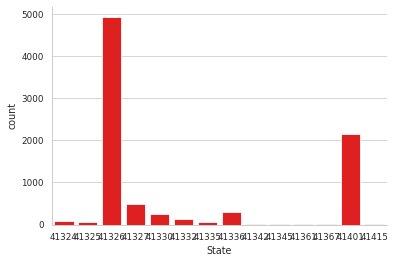

In [10]:
seaborn.countplot(dataset.State, color='red')
seaborn.despine()

In [30]:
one_hot_columns = {
    one_hot_col: dataset[one_hot_col].max()
    for one_hot_col in ['Type','Gender', 'Color1','Color2', 'Color3','MaturitySize','Vaccinated','Dewormed', 'Sterilized',
                       'Health',]
}

In [33]:
numeric_columns = ['Age', 'Fee', 'State']

In [36]:
embedded_columns = {
    embedded_col: dataset[embedded_col].max() + 1
    for embedded_col in ['Breed1','Breed2']
}

In [97]:
print(one_hot_columns)

print(tf.keras.utils.normalize(dataset.Age.to_numpy()))
#type(dataset.Age.to_numpy())

{'Type': 2, 'Gender': 3, 'Color1': 7, 'Color2': 7, 'Color3': 7, 'MaturitySize': 4, 'Vaccinated': 3, 'Dewormed': 3, 'Sterilized': 3, 'Health': 3}
[[0.00051048 0.00102096 0.00204192 ... 0.00102096 0.00204192 0.00357337]]


In [44]:
print(tf.keras.utils.normalize(numpy.array([1,1,1,1,2,3,4,5,6,7,8,9])))

[[0.05892557 0.05892557 0.05892557 0.05892557 0.11785113 0.1767767
  0.23570226 0.29462783 0.35355339 0.41247896 0.47140452 0.53033009]]


In [50]:
#dataset.Gender

print(tf.keras.utils.to_categorical(dataset.Gender - 1, 3))

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [60]:
for embedded_col in embedded_columns.keys():
    print(embedded_col)

Breed1
Breed2


In [61]:
 for n_col in numeric_columns:
        print(n_col)

Age
Fee
State


In [89]:
def process_features(df):
    direct_features = []

    # Create one hot encodings
    for one_hot_col, max_value in one_hot_columns.items():
        direct_features.append(tf.keras.utils.to_categorical(df[one_hot_col] - 1, max_value))
           
    # Concatenate all features that don't need further embedding into a single matrix.
    features = {'direct_features': numpy.hstack(direct_features)}

    # Create embedding columns - nothing to do here. We will use the zero embedding for OOV
    for embedded_col in embedded_columns.keys():
        features[embedded_col] = df[embedded_col].values

    # Create and append numeric columns
    # Don't forget to normalize!
    #Agregado por JPA
    for n_col in numeric_columns:
        features[n_col] = tf.keras.utils.normalize(df[n_col].values)    
        
        
    # Convert labels to one-hot encodings
    targets = tf.keras.utils.to_categorical(df[target_col], nlabels)
    
    return features, targets

In [90]:
X_train, y_train = process_features(dataset)

In [91]:
#X_train["Fee"]
X_train['direct_features'].shape[1]

42

In [92]:
direct_features_input_shape = (X_train['direct_features'].shape[1],)
direct_features_input_shape

(42,)

In [98]:
print(y_train)
print(X_train)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
{'direct_features': array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], dtype=float32), 'Breed1': array([307, 292, 266, ..., 307, 285, 265]), 'Breed2': array([307, 265, 299, ...,   0, 265,   0]), 'Age': array([[0.00051048, 0.00102096, 0.00204192, ..., 0.00102096, 0.00204192,
        0.00357337]]), 'Fee': array([[0., 0., 0., ..., 0., 0., 0.]]), 'State': array([[0.0108636, 0.0108636, 0.0108636, ..., 0.0108636, 0.0108636,
        0.0108636]])}


In [96]:
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) #.batch(batch_size)
#Agregado por JPA  - shuffle the train dataset!
#train_ds = train_ds.shuffle(buffer_size=100)

#test_ds = tf.data.Dataset.from_tensor_slices(process_features(dev_dataset)).batch(batch_size)

ValueError: Dimensions 1 and 8465 are not compatible